#Value at Risk (VaR) Analysis of Nifty50 Portfolio

This project performs a Value at Risk (VaR) analysis for the Nifty50 index using three methods:
- Variance-Covariance
- Historical Simulation
- Monte Carlo Simulation

The portfolio is equally weighted across all available Nifty50 stocks using daily adjusted closing prices from Yahoo Finance.


At this point, we will download or import necessary modules

In [16]:
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

We define a list of Nifty50 stock tickers as of now for downloading.

In [17]:
nifty50 = [
    "ADANIPORTS.NS", "ASIANPAINT.NS", "AXISBANK.NS", "BAJAJ-AUTO.NS", "BAJFINANCE.NS",
    "BAJAJFINSV.NS", "BPCL.NS", "BHARTIARTL.NS", "BRITANNIA.NS", "CIPLA.NS", "COALINDIA.NS",
    "DIVISLAB.NS", "DRREDDY.NS", "EICHERMOT.NS", "GRASIM.NS", "HCLTECH.NS", "HDFCBANK.NS",
    "HDFCLIFE.NS", "HEROMOTOCO.NS", "HINDALCO.NS", "HINDUNILVR.NS", "ICICIBANK.NS",
    "ITC.NS", "INDUSINDBK.NS", "INFY.NS", "JSWSTEEL.NS", "KOTAKBANK.NS", "LT.NS",
    "M&M.NS", "MARUTI.NS", "NTPC.NS", "NESTLEIND.NS", "ONGC.NS", "POWERGRID.NS",
    "RELIANCE.NS", "SBILIFE.NS", "SBIN.NS", "SUNPHARMA.NS", "TCS.NS", "TATACONSUM.NS",
    "TATAMOTORS.NS", "TATASTEEL.NS", "TECHM.NS", "TITAN.NS", "UPL.NS", "ULTRACEMCO.NS",
    "WIPRO.NS", "LTIM.NS", "HDFCAMC.NS", "BAJAJHLDNG.NS"
]

We download **close prices** for all Nifty50 stocks from Yahoo Finance. Some stocks may fail to return data — those are excluded automatically.

In [27]:
start_date = "2023-08-29"
end_date = "2024-08-29"

valid_tickers = []
failed_tickers = []
adj_close = pd.DataFrame()

for ticker in nifty50:
    try:
        df = yf.download(ticker, start=start_date, end=end_date)['Close']
        if df.dropna().empty:
            raise ValueError("No data")
        adj_close[ticker] = df
        valid_tickers.append(ticker)
    except Exception as e:
        failed_tickers.append(ticker)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [28]:
print(f"Successfully fetched {len(valid_tickers)} tickers:")
valid_tickers

Successfully fetched 50 tickers:


['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS',
 'LTIM.NS',
 'HDFCAMC.NS',
 'BAJAJHLDNG.NS']

In [29]:
print(f"Failed to fetch {len(failed_tickers)} tickers:")
print(failed_tickers)

Failed to fetch 0 tickers:
[]


In [30]:
adj_close

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,BRITANNIA.NS,CIPLA.NS,...,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,UPL.NS,ULTRACEMCO.NS,WIPRO.NS,LTIM.NS,HDFCAMC.NS,BAJAJHLDNG.NS
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-29,816.061401,3213.337402,979.943726,4626.945312,7245.001953,1502.502075,161.866257,850.460571,4472.535156,1219.410645,...,600.122437,114.518280,1153.304688,3069.356689,596.566345,8151.360352,200.074356,5009.367676,2388.541504,7197.504883
2023-08-30,811.255493,3222.138916,982.591675,4637.311035,7219.918945,1500.553345,159.666016,852.996399,4492.327148,1225.756836,...,598.540894,116.960945,1152.534302,3072.147461,598.862427,8217.219727,199.633133,5045.353027,2405.178467,7244.430664
2023-08-31,784.996460,3184.389160,972.749268,4576.604492,7115.515625,1487.961304,154.494263,851.653931,4410.344727,1247.026489,...,594.043579,117.727280,1157.107178,3094.324951,590.127563,8248.534180,200.221436,5064.613281,2434.498047,7263.669922
2023-09-01,792.230042,3187.763428,990.385681,4630.814453,7272.070801,1513.545166,156.150146,861.151001,4426.731445,1234.929077,...,604.125549,121.702614,1182.233521,3106.634766,601.957031,8213.691406,204.118988,5171.836426,2344.851318,7169.037109
2023-09-04,793.765930,3164.291992,981.492554,4599.766113,7222.055176,1509.147827,156.376953,860.504578,4449.287598,1228.434082,...,601.950989,126.204796,1209.862671,3090.188477,606.399353,8531.953125,212.821075,5232.640137,2365.635498,7057.558105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-22,1485.074951,3152.065918,1169.949951,9914.200195,6702.244141,1625.699951,343.316437,1486.349976,5836.799805,1585.800049,...,1059.341919,150.627289,1596.906128,3604.399902,579.150024,11309.400391,254.443985,5634.359375,4343.880859,9821.663086
2024-08-23,1484.079712,3120.461914,1165.949951,10406.450195,6694.541016,1639.900024,345.375763,1506.750000,5792.649902,1574.550049,...,1075.899658,150.685913,1584.170532,3570.000000,573.700012,11341.799805,251.208298,5572.330566,4304.960938,9814.953125
2024-08-26,1475.372070,3136.981201,1170.300049,10432.549805,6736.780762,1686.199951,344.346069,1513.550049,5796.950195,1593.949951,...,1083.087769,152.151733,1625.548950,3630.199951,577.450012,11337.099609,254.934235,5669.473145,4324.396484,9852.476562


We calculate daily percentage returns and create an equally weighted portfolio using `numpy`.

In [31]:
returns = adj_close.pct_change().dropna()
weights = np.full(len(valid_tickers), 1 / len(valid_tickers))

In [32]:
returns

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,BRITANNIA.NS,CIPLA.NS,...,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,UPL.NS,ULTRACEMCO.NS,WIPRO.NS,LTIM.NS,HDFCAMC.NS,BAJAJHLDNG.NS
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-30,-0.005889,0.002739,0.002702,0.002240,-0.003462,-0.001297,-0.013593,0.002982,0.004425,0.005204,...,-0.002635,0.021330,-0.000668,0.000909,0.003849,0.008080,-0.002205,0.007184,0.006965,0.006520
2023-08-31,-0.032368,-0.011716,-0.010017,-0.013091,-0.014460,-0.008392,-0.032391,-0.001574,-0.018249,0.017352,...,-0.007514,0.006552,0.003968,0.007219,-0.014586,0.003811,0.002947,0.003817,0.012190,0.002656
2023-09-01,0.009215,0.001060,0.018130,0.011845,0.022002,0.017194,0.010718,0.011151,0.003716,-0.009701,...,0.016972,0.033767,0.021715,0.003978,0.020046,-0.004224,0.019466,0.021171,-0.036823,-0.013028
2023-09-04,0.001939,-0.007363,-0.008979,-0.006705,-0.006878,-0.002905,0.001452,-0.000751,0.005095,-0.005259,...,-0.003600,0.036993,0.023370,-0.005294,0.007380,0.038748,0.042632,0.011757,0.008864,-0.015550
2023-09-05,0.004869,-0.003786,-0.000814,0.013899,0.010295,0.000232,0.015956,0.000693,0.001720,0.000081,...,0.003530,-0.000380,-0.001750,0.011563,0.000988,-0.014879,-0.005183,0.011266,0.007665,-0.006898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-22,-0.007449,0.011122,-0.003789,0.006313,0.001225,0.002930,-0.003132,0.015648,-0.000094,-0.005519,...,-0.015435,0.014613,0.004113,0.012358,0.019092,0.009687,-0.013964,-0.001584,0.008167,0.013790
2024-08-23,-0.000670,-0.010026,-0.003419,0.049651,-0.001149,0.008735,0.005998,0.013725,-0.007564,-0.007094,...,0.015630,0.000389,-0.007975,-0.009544,-0.009410,0.002865,-0.012717,-0.011009,-0.008960,-0.000683
2024-08-26,-0.005867,0.005294,0.003731,0.002508,0.006310,0.028233,-0.002981,0.004513,0.000742,0.012321,...,0.006681,0.009728,0.026120,0.016863,0.006537,-0.000414,0.014832,0.017433,0.004515,0.003823


In [33]:
weights

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

- **Variance-Covariance Method:** Assumes returns are normally distributed
- **Historical Method:** Uses empirical return distribution
- **Monte Carlo Method:** Simulates future returns based on mean and covariance

In [34]:
def variance_method(retns, weights, z_score):
    mean_ret = retns.mean()
    fmean = np.dot(mean_ret, weights)
    cov_matrix = retns.cov()
    port_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    std_dev = np.sqrt(port_var)
    return fmean + std_dev * z_score

In [ ]:
def historical_method(retns, conf, weights):
    port_ret = retns.dot(weights)
    port_ret_sorted = np.sort(port_ret)
    index = int((1 - conf) * len(port_ret_sorted))
    return port_ret_sorted[index]

In [35]:
def monte_carlo_method(retns, conf, weights, return_all=False):
    mean_ret = retns.mean()
    cov_matrix = retns.cov()
    simulations = np.random.multivariate_normal(mean_ret, cov_matrix, 100000)
    port_returns = simulations.dot(weights)
    var_value = np.percentile(port_returns, (1 - conf) * 100)
    return (var_value, port_returns) if return_all else var_value

We take the confidence level as input and compute portfolio VaR using all three methods. Results are displayed in percentage format.

In [36]:
confidence = float(input("Enter confidence level (e.g., 0.95): "))
z_score = stats.norm.ppf(confidence)

Enter confidence level (e.g., 0.95): 0.98


In [37]:
print(f"Value at Risk (VaR) for Portfolio of {len(valid_tickers)} stocks:")

Value at Risk (VaR) for Portfolio of 50 stocks:


In [44]:
# Variance-Covariance
var_variance = abs(variance_method(returns, weights, z_score))

print(f"VaR (Variance-Covariance): {var_variance*100:.3f}%")

VaR (Variance-Covariance): 1.864%


In [43]:
# Historical
var_historical = abs(historical_method(returns, confidence, weights))

print(f"VaR (Historical): {var_historical*100:.3f}%")

VaR (Historical): 1.700%


In [42]:
# Monte Carlo + simulated returns
var_monte_carlo, simulated_returns = monte_carlo_method(returns, confidence, weights, return_all=True)

print(f"VaR (Monte Carlo): {abs(var_monte_carlo)*100:.3f}%")

VaR (Monte Carlo): 1.563%


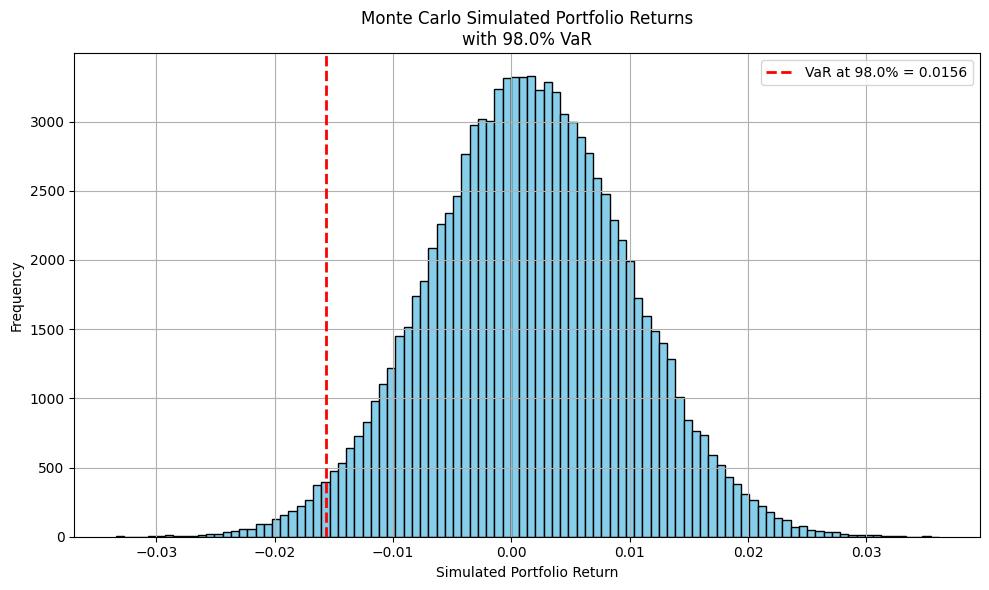

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns, bins=100, color='skyblue', edgecolor='black')
plt.axvline(var_monte_carlo, color='red', linestyle='--', linewidth=2, label=f'VaR at {confidence*100:.1f}% = {abs(var_monte_carlo):.4f}')
plt.title(f"Monte Carlo Simulated Portfolio Returns\nwith {confidence*100:.1f}% VaR")
plt.xlabel("Simulated Portfolio Return")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We generate a histogram of simulated portfolio returns and mark the VaR threshold with a red dashed line to show the risk boundary.